#  **Hall Effect**

**Submitted by:** Aditya Dev (MS19022)

## **Objectives** 

-  To find the Hall coefficient from Hall Voltage v/s Current Graph. 
-  Determine the concentration of majority charge carriers in the probe.  
-  Determine the conductivity of the specimen 
-  Find the mobility of the charge carriers.  
-  Determine the type of charge carriers.

### Dimensions of Specimen 

 * $L_x = 6 mm$ 
 * $L_y = 4 mm$ 
 * $L_x = 0.5 mm$ 

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("seaborn-dark")
from IPython.display import display, Markdown

In [2]:
## SETTING THE DIMENSIONS OF THE SPECIMEN
Lx, Ly, Lz = np.array([6, 4, 0.5])*10**-3  ## IN SI UNITS (m)

# FUNCTION TO BE USED FOR CURVE FITTING
def f(x, m, c):
    return m*x + c   ## THIS LINEAR RELATION WILL BE USED IN ALL THE COMING PLOTS

## **Reading the data from the CSV file** 

In [3]:
g3600 = pd.read_csv("B3600G.csv")  ## data containing hall voltage at B = 3600 Gauss
g2180 = pd.read_csv("B2180G.csv")  ## data containing hall voltage at B = 2180 Gauss

## Makes a new column with average Hall voltage

g2180["Avg. Voltage"] = 0.5*(g2180["Hall Voltage(mV)"] - g2180["Hall Voltage 2"])
g3600["Avg. Voltage"] = 0.5*(g3600["Hall Voltage(mV)"] - g3600["Hall Voltage 2"])

display(Markdown("**CURRENT AND HALL VOLTAGE DATA FOR B = 3600 Gauss**"))
display(g3600)
display(Markdown("**CURRENT AND HALL VOLTAGE DATA FOR B = 2180 Gauss**"))
display(g2180)

**CURRENT AND HALL VOLTAGE DATA FOR B = 3600 Gauss**

,Current(mA),Hall Voltage(mV),Hall Voltage 2,Avg. Voltage
0,5.00,9.3,-8.2,8.75
1,5.50,10.1,-9.0,9.55
2,5.91,11.0,-9.7,10.35
3,6.49,12.0,-10.6,11.30
4,6.90,12.8,-11.2,12.00
5,7.31,13.5,-11.8,12.65
6,7.73,14.4,-12.5,13.45
7,8.03,14.9,-13.0,13.95
8,8.54,15.9,-13.7,14.80
9,8.91,16.5,-14.3,15.40


**CURRENT AND HALL VOLTAGE DATA FOR B = 2180 Gauss**

,Current(mA),Hall Voltage(mV),Hall Voltage 2,Avg. Voltage
0,4.69,6,-5,5.5
1,6.10,8,-7,7.5
2,7.20,10,-9,9.5
3,8.50,11,-10,10.5
4,9.10,12,-11,11.5


## **Plotting data for magnetic field B = 3600 G**

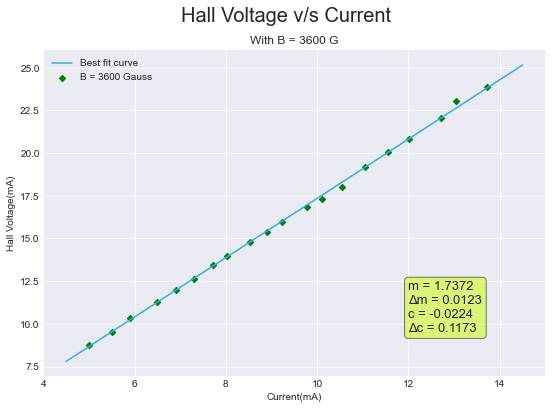

In [4]:
g3600.plot("Current(mA)", "Avg. Voltage", kind = "scatter",
           xlabel  = "Current(mA)", ylabel = "Hall Voltage(mA)",
           figsize = [3*3, 2*3], marker = "D",
           color = "green", grid = True, label = "B = 3600 Gauss")

# FINDING THE FEST FIT CURVE
x = np.linspace(4.5, 14.5, 1000)
args2, _2 = sp.curve_fit(f, g3600["Current(mA)"], g3600["Avg. Voltage"])  ## curve fitting

m = args2[0]

Δm, Δc = np.sqrt(np.diag(_2))  ## Standard deviation
#########################

plt.plot(x, f(x, *args2), color = "#33afe8",
        label = "Best fit curve")

### TEXT BOX
text = "\n".join(["m = {:.4f}".format(m), "Δm = {:.4f}".format(Δm),
                  "c = {:.4f}".format(args2[1]), "Δc = {:.4f}".format(Δc)])

props = dict(boxstyle='round', facecolor='#ccff00',
             alpha = 0.5, edgecolor = "black")

plt.text(12, 12.5, text, fontsize=13, 
        verticalalignment='top', bbox = props)
##########################

plt.legend()
plt.suptitle("Hall Voltage v/s Current", 
             fontsize = 20)

plt.title("With B = 3600 G", fontsize = 12)
plt.savefig("B3600.png", dpi = 300)

### **Calculating the Hall Coefficient: B = 3600 G**


We know the relation:
$$V_H = \frac{R_H \cdot B}{L_z} I$$

So, in the above graph (_slope_) $m = \frac{R_H \cdot B}{L_z}$ . Therefore we have

In [5]:
B = 3600e-4 ## IN TESLA

Rh1 = (m*Lz)/(B)
ΔRh1 = (Rh1*Δm)/(m)

display(Markdown("_**Using the values we get:**_\n"))
display(Markdown("""$R_H$ : {:.5f} $\Omega·m \over T$

$\Delta R_H$:  {:.5f} $\Omega·m \over T$""".format(Rh1,  ΔRh1)))

_**Using the values we get:**_


$R_H$ : 0.00241 $\Omega·m \over T$

$\Delta R_H$:  0.00002 $\Omega·m \over T$

## **Plotting data for magnetic field B = 2180 G**

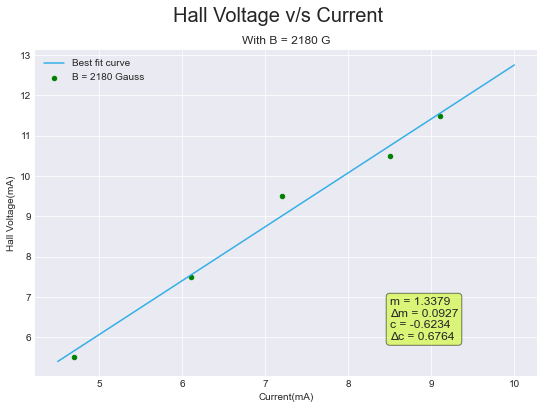

In [6]:
g2180.plot("Current(mA)", "Avg. Voltage", kind = "scatter",
           xlabel  = "Current(mA)", ylabel = "Hall Voltage(mA)",
           figsize = [3*3, 2*3], title = "Hall Voltage v/s Current",
           color = "green", grid = True, label = "B = 2180 Gauss")

# FINDING THE FEST FIT CURVE
x = np.linspace(4.5, 10, 1000)
args3, _3 = sp.curve_fit(f, g2180["Current(mA)"], g2180["Avg. Voltage"])

m = args3[0]

Δm, Δc = np.sqrt(np.diag(_3))  ## Standard deviation
######################

plt.plot(x, f(x, *args3), color = "#33afe8",
        label = "Best fit curve")

### TEXT BOX
text = "\n".join(["m = {:.4f}".format(m), "Δm = {:.4f}".format(Δm),
                  "c = {:.4f}".format(args3[1]), "Δc = {:.4f}".format(Δc)])

props = dict(boxstyle='round', facecolor='#ccff00',
             alpha=0.5, edgecolor = "black")

plt.text(8.5, 7, text, fontsize=12, 
        verticalalignment='top', bbox=props)
##########################


plt.legend()
plt.suptitle("Hall Voltage v/s Current", 
             fontsize = 20)

plt.title("With B = 2180 G", fontsize = 12)
plt.savefig("B2180.png", dpi = 300)

### **Calculating the Hall Coefficient: B= 2180 G**

Using the same relation in the above case, we get

In [7]:
B = 2180e-4 ## IN TESLA

Rh2 = (m*Lz)/(B)
ΔRh2 = (Rh2*Δm)/(m)

display(Markdown("**Using the values we get:** \n"))
display(Markdown("""$R_H$ : {:.5f} $\Omega·m \over T$

$\Delta R_H$:  {:.5f} $\Omega·m \over T$""".format(Rh2,  ΔRh2)))

**Using the values we get:** 


$R_H$ : 0.00307 $\Omega·m \over T$

$\Delta R_H$:  0.00021 $\Omega·m \over T$

## **Concentration ($n$) of the Charge Carriers**

Remember the relation:
$$ R_H = \frac{1}{qn}$$

This implies:
$$n = {1 \over qR_H }$$

In [8]:
q = 1.60217662e-19

n1, n2   =  (q*Rh1)**-1   , (q*Rh2)**-1
Δn1, Δn2 =  (n1*ΔRh1)/(Rh1), (n2*ΔRh2)/(Rh2)

display(Markdown("We get the result:"))
display(Markdown(""" **1. For B = 3600 G**

$n$ =  {} $1 \over m^3$

$\Delta n$:  {} $1 \over m^3$""".format(n1,  Δn1)))

display(Markdown("""**2. For B = 2180 G**

$n$ =  {} $1 \over m^3$

$\Delta n$:  {} $1 \over m^3$""".format(n2,  Δn2)))

We get the result:

 **1. For B = 3600 G**

$n$ =  2.586886621857491e+21 $1 \over m^3$

$\Delta n$:  1.828696297391816e+19 $1 \over m^3$

**2. For B = 2180 G**

$n$ =  2.0339656719982146e+21 $1 \over m^3$

$\Delta n$:  1.4094658053097157e+20 $1 \over m^3$

## **Voltage v/s Current with magnetic field turned off**

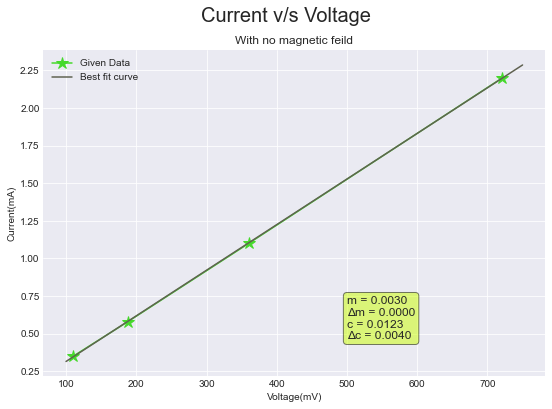

In [9]:
i = np.array([0.35, 0.58, 1.1, 2.2]) #* 10**-3
V = np.array([110, 188, 360, 721]) #* 10**-3

####################################
x = np.linspace(100, 750, 1000)
args1, _1 = sp.curve_fit(f, V, i)  ## curve fitting
m = args1[0]

Δm, Δc = np.sqrt(np.diag(_1))  ## Standard deviation
####################################

plt.figure(figsize = [9, 6])

plt.plot(V, i, "#45d92b", marker = "*", 
         markersize = 12, label = "Given Data")

plt.plot(x, f(x, *args1), "#5f6150", 
         label = "Best fit curve")

plt.ylabel("Current(mA)")
plt.xlabel("Voltage(mV)")

plt.suptitle("Current v/s Voltage", 
             fontsize = 20)
plt.title("With no magnetic feild", fontsize = 12)


##### TEXT BOX IN PLOT
text = "\n".join(["m = {:.4f}".format(m), "Δm = {:.4f}".format(Δm),
                  "c = {:.4f}".format(args1[1]), "Δc = {:.4f}".format(Δc)])

props = dict(boxstyle='round', facecolor='#ccff00',
             alpha=0.5, edgecolor = "black")

plt.text(500, 0.75, text, fontsize=12, 
        verticalalignment='top', bbox=props)
#######################

plt.grid(True)
plt.legend()
plt.savefig("conductivity.png", dpi = 300)

Calculating **Resistivity** ($\sigma$)

We know the relation 
$$R = \frac{L_x}{\sigma L_y \times L_z }$$
$$\sigma = \frac{L_x}{R L_y \times L_z} =  \frac{m\times L_x}{L_y \times L_z} $$

The values for *$m = R^{-1}$* and *$\Delta m$* are shown in th above graph.

In [10]:
sigma = (m*Lx)/(Ly*Lz)
Δsigma = (sigma*Δm)/(m)

display(Markdown("_**Using the values we get:**_\n"))
display(Markdown("""$\sigma$ : ${:.4f}$ $(\Omega·m)^-1$

$\Delta \sigma$:  ${:.4f}$ $(\Omega·m)^-1$""".format(sigma,  Δsigma)))

_**Using the values we get:**_


$\sigma$ : $9.0951$ $(\Omega·m)^-1$

$\Delta \sigma$:  $0.0285$ $(\Omega·m)^-1$

## **Mobility ($\mu$) of the Charge Carriers**

Remember the relation:
$$\sigma = n q \mu$$ 
$$R_H = \frac{1}{qn}$$

This implies:
$$\mu = {\sigma \times R_H}$$

We get:

In [13]:
mu1, mu2 = sigma * Rh1, sigma * Rh2

Δmu1, Δmu2 = mu1*np.sqrt((Δsigma/sigma)**2 + (ΔRh1/Rh1)**2), mu2*np.sqrt((Δsigma/sigma)**2 + (ΔRh2/Rh2)**2)

display(Markdown("We get the result:"))
display(Markdown(""" **1. For B = 3600 G**

$\mu$ =  {:.5f} $m^3 \over V s$

$\Delta \mu$:  {:.4f} $m^3 \over V s$""".format(mu1,  Δmu1)))

display(Markdown("""**2. For B = 2180 G**

$\mu$ =  {:.5f} $m^3 \over V s$

$\Delta \mu$:  {:.5f} $m^3 \over V s$""".format(mu2,  Δmu2)))

We get the result:

 **1. For B = 3600 G**

$\mu$ =  0.02194 $m^3 \over V s$

$\Delta \mu$:  0.0002 $m^3 \over V s$

**2. For B = 2180 G**

$\mu$ =  0.02791 $m^3 \over V s$

$\Delta \mu$:  0.00194 $m^3 \over V s$

# **Final Results**

$\sigma = (9.09 \pm 0.03) (\Omega·m)^{-1}$

## **For B = 3600 Gauss**
$R_H = (2.41 \pm 0.02) \cdot 10^{-3} \frac{\Omega m}{T}$

$n = (2.59 \pm 0.02) \cdot 10^{21}  m^{-3}$

$\mu = (2.19 \pm 0.02) \frac{m^3}{Vs}$

## **For B = 2180 Gauss**
$R_H = (3.07 \pm 0.21) \cdot 10^{-3} \frac{\Omega m}{T}$

$n = (2.03 \pm 0.14) \cdot 10^{21}  m^{-3}$

$\mu = (2.79 \pm 0.19) \frac{m^3}{Vs}$

The charge carrier in the sample were ***electrons***.  Same was used for calculating the mobility and density of the charfe carriers. 